## Bank-Full

Q-Output variable -> y y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no"

In [5]:
#3 importing libraraies or preprocessing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [6]:
bank_data=pd.read_csv("C:\\Users\\HP\\Downloads\\bank-full (2).csv",delimiter=";")

In [7]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Exploratory Analysis

In [8]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [9]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
## converting text into numeric so we use dummy value
new_value=pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome','month'])
new_value

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
## encoding the text value converted string into numeric value
new_value['default'] = np.where(new_value['default'].str.contains("yes"), 1, 0)
new_value['housing'] = np.where(new_value['housing'].str.contains("yes"), 1, 0)
new_value['loan'] = np.where(new_value['loan'].str.contains("yes"), 1, 0)
new_value['y'] = np.where(new_value['y'].str.contains("yes"), 1, 0)
new_value

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
new_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [13]:
new_value.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,...,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,...,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Analysis The Feature

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    39922
1     5289
Name: y, dtype: int64

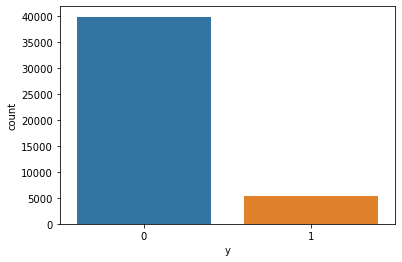

In [14]:
sns.countplot('y',data=new_value)
new_value['y'].value_counts()

In [15]:
new_value.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,...,0.022872,-0.001198,-0.007466,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,...,-0.009344,-0.009027,-0.006990,0.044257,0.007582,-0.013991,-0.002946,0.006129,-0.017454,-0.013953
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,...,0.021594,-0.003537,-0.024421,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,...,-0.050556,-0.064523,-0.066448,-0.061231,-0.102298,-0.066284,0.427980,0.001152,-0.085439,-0.076343
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,...,-0.020459,-0.008842,-0.004450,0.167764,-0.022749,-0.029761,-0.027867,0.019154,-0.030097,-0.033663
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,...,-0.011368,-0.283326,0.250523,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,...,0.019057,-0.009557,0.006989,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,...,-0.012635,-0.030747,-0.063064,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,...,0.047236,0.071023,0.049509,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,...,0.036628,0.065243,0.047004,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990


In [16]:
new_value.shape

(45211, 49)

## Model Building

In [17]:
## setting value dependent and independent value
X=new_value.drop(["y"],axis=1)
y=new_value[["y"]]

In [18]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X, y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
## predicting test value
y_pred = lr_model.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
import numpy as np
np.set_printoptions(suppress=True)
lr_model.predict_proba(X)[0:20]

array([[0.93969905, 0.06030095],
       [0.96203725, 0.03796275],
       [0.96991084, 0.03008916],
       [0.96938603, 0.03061397],
       [0.87012763, 0.12987237],
       [0.94126047, 0.05873953],
       [0.92107737, 0.07892263],
       [0.86429684, 0.13570316],
       [0.97217042, 0.02782958],
       [0.97296766, 0.02703234],
       [0.93830804, 0.06169196],
       [0.94986877, 0.05013123],
       [0.88284818, 0.11715182],
       [0.97361572, 0.02638428],
       [0.96953533, 0.03046467],
       [0.90233553, 0.09766447],
       [0.95941368, 0.04058632],
       [0.98121654, 0.01878346],
       [0.94942944, 0.05057056],
       [0.96907443, 0.03092557]])

## Evaluation Model

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.59      0.24      0.35      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



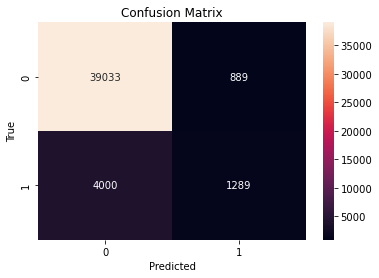

In [24]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y, y_pred))

In [25]:
lr_model.predict_proba(X)[:,1] 

array([0.06030095, 0.03796275, 0.03008916, ..., 0.6392866 , 0.07995344,
       0.2773023 ])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[21150 18772]
 [   82  5207]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69     39922
           1       0.22      0.98      0.36      5289

    accuracy                           0.58     45211
   macro avg       0.61      0.76      0.52     45211
weighted avg       0.91      0.58      0.65     45211

accuracy_score =0.583


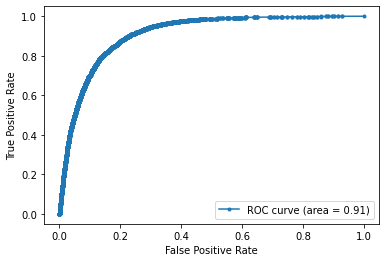

In [26]:
## ROC and AUC curve
from sklearn.metrics import accuracy_score


logmodel = LogisticRegression(solver ='liblinear',class_weight = {0:0.02,1:1})
#logmodel = LogisticRegression(solver ='liblinear')
logmodel.fit(X,y)
predictions = logmodel.predict(X)
print(confusion_matrix(y,predictions))
print(classification_report(y,predictions))
acc = accuracy_score(y,predictions)

print ('accuracy_score =%.3f' %(acc))

#y_score = logmodel.fit(X, y).decision_function(X)
model_probs = logmodel.predict_proba(X)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve(y, y_score)
auc = roc_auc_score(y, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')